We will develop a stochastic (probabilistic) model of an infection propagating in a population that is well mixed, i.e. in which everyone is in contact with everyone else. An example of this would be a small school or university in which people are constantly moving around and interacting with each other.

As usual, we will make modelling assumptions that allow us to reach the goal as fast and simply as possible.

The model is an individual-based or agent-based model -- in other words, we explicitly keep track of each individual in the population and what their infection status is. However, we will not keep track of their position in space; we will just assume that there is some mechanism by which they interact with other individuals which we do not include in the model.

# Modelling the spread of an infection or rumour

In [1]:
@enum InfectionStatus S I R

In [2]:
x = S

S::InfectionStatus = 0

In [3]:
Int(x)

0

In [4]:
y = R

R::InfectionStatus = 2

In [5]:
z = I

I::InfectionStatus = 1

In [6]:
N = 100

agents = [S for _ in 1:N];

In [7]:
ind = rand(1:100)
agents[ind] = I

I::InfectionStatus = 1

In [8]:
ind

8

In [9]:
agents[ind]

I::InfectionStatus = 1

function step! takes a Vector agents and a probability p_I as arguments. This function may modify the content of agents to implement one step of the infection dynamics.

- Choose an agent $i$ at random.
- If $i$ is not infectious then nothing happens on this step so you can just return from the function.
- Choose another agent $j$ at random. Make sure that $i \neq j$. To do so, repeat this choice until $i \neq j$.
- If $j$ is susceptible then $i$ infects $j$ with probability $p_I$.

In [10]:
function step!(agents, p_I)
    n = length(agents)
    i = rand(1:n)
    
    if agents[i] == I
        j = i
        while j==i
            j = rand(1:n)
        end
        if agents[j]==S
            agents[j] = rand()<=p_I ? I : S
        end
    end
    return
end

step! (generic function with 1 method)

function sweep! takes arguments agents and $p_I$. It runs step! $N$ times, where $N$ is the number of agents. Thus each agent acts, on average, once per sweep. One sweep is thus the unit of time in our **Monte Carlo simulation**.

In [11]:
function sweep!(agents, p_I)
    n = length(agents)
    [step!(agents, p_I) for _ in 1:n]
end

sweep! (generic function with 1 method)

function infection_simulation should take $N$ and $p_I$ as arguments, as well as $T$, the total number of steps.

First generate the Vector agents of length $N$, picking one to be initially infected, and a Vector Is to store the number of infectious individuals at each step.

Run sweep! a number $T$ of times. Calculate the total number of infectious agents at the end of each step and store that number in Is.

Return Is as the output of the function.

In [12]:
function infection_simulation(N, p_I, T)
    agents = [S for _ in 1:N]
    ind = rand(1:N)
    agents[ind] = I
    Is = [1]
    
    for _ in 1:T
        sweep!(agents, p_I)
        n = count(agents .== I)
        push!(Is, n)
    end
    
    return Is
end

infection_simulation (generic function with 1 method)

Running the simulation 50 times with $N=100$ and collecting the data in a Vector of Vectors called results, using $p_I = 0.02$ and $T = 1000$.

Then we plot each of the 50 graphs on the same plot using transparency 0.5

In [13]:
N = 100
T = 1000
p_I = 0.02

results = [zeros(Int, T+1)]

for i in 1:50
    data = infection_simulation(N, p_I, T)
    if i == 1
        results[i] += data
    else
        push!(results, data)
    end
end

In [14]:
results

50-element Vector{Vector{Int64}}:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [1, 1, 1, 2, 2, 2, 2, 2, 2, 2 

In [15]:
using Plots

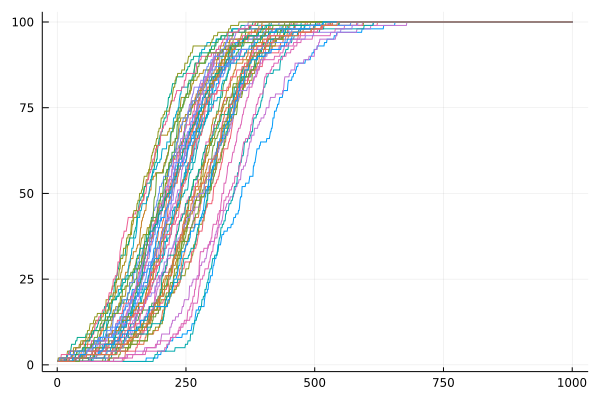

In [16]:
len = length(results)
p = plot(leg=false)
for i in 1:len
    plot!(1:1:(T+1), results[i], transparency=0.5)
end
p

Mean trajectory using the mean function applied to results.

In [17]:
using Statistics

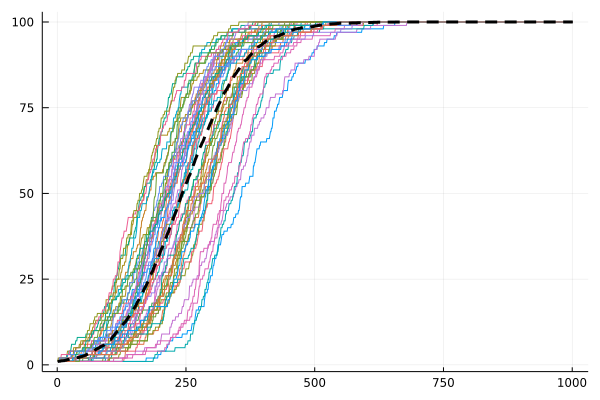

In [18]:
len = length(results)
p = plot(leg=false)
for i in 1:len
    plot!(1:1:(T+1), results[i], transparency=0.5)
end
plot!(mean(results), ls=:dash, lw=3, color=:black)
p

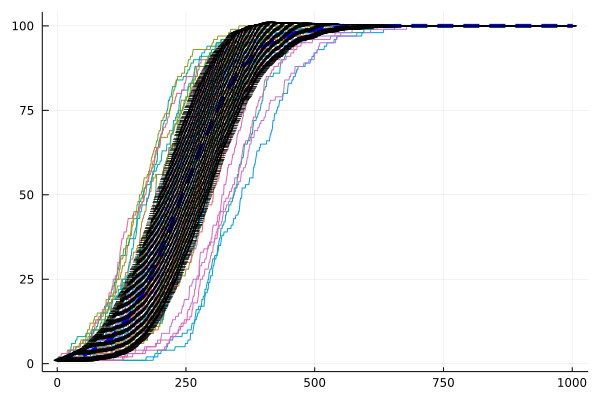

In [19]:
len = length(results)
p = plot(leg=false)
σ = std(results)
for i in 1:len
    plot!(1:1:(T+1), results[i], transparency=0.5)
end
plot!(mean(results), ls=:dash, lw=4, yerr=σ, transparency=0.9, color=:blue)
p

In [20]:
std(results[1])

34.90518754973418

**The difference between a deterministic model(here, the deterministic analog is the sigmoid function) and its stochastic analog is due to the randomness of the stochastic model.**

**But as the number of trials limits to infinity we get a very close approximation of the deterministic model**

# Agent type

Suppose we want to track more information about each agent, e.g. how many other agents were infected by that agent. We could just create an additional array with that information in, but we will need to pass that around and will start to lose track of what belongs together.

Instead a good solution is to define a custom composite type.

In [21]:
mutable struct Agent
    status::InfectionStatus
    num_infected::Int
end

In [22]:
Agent() = Agent(S, 0) # The constructor for our agent type

Agent

In [23]:
x = Agent()

Agent(S, 0)

In [24]:
x.status

S::InfectionStatus = 0

In [25]:
x.num_infected

0

Now we have to rewrite the code from the previous part to function with the agent type.

This time we will be able to keep track of the number of people infected by an Agent.

Then this data will be used to analyze the probability distribution of the number of people infected by an agent.

In [26]:
function step!(agents::Vector{Agent}, p_I)
    n = length(agents)
    i = rand(1:n)
    
    if agents[i].status == I
        j = i
        while j==i
            j = rand(1:n)
        end
        if agents[j].status == S
            #agents[j].status = rand()<=p_I ? I : S
            if rand() <= p_I
                agents[j].status = I
                agents[i].num_infected += 1
            end
        end
    end
    return
end

step! (generic function with 2 methods)

In [27]:
function sweep!(agents::Vector{Agent}, p_I)
    n = length(agents)
    [step!(agents, p_I) for _ in 1:n]
end

sweep! (generic function with 2 methods)

Now we plan to call the simulation function num_infected_dist_simulation, where we create an array agents of Agents of size $N=100$ and set the first one's infection status to I.

Update an agent's num_infected field whenever it infects another agent.

At the end of the simulation, extract the probability distribution of the "number of agents infected", using functions: counts and probability_distribution. This should be returned from num_infected_dist_simulation

In [28]:
function counts(data)
    dict = Dict{Int, Int}()
    
    for i in 1:length(data)
        if haskey(dict, data[i])
            dict[data[i]] += 1
        else
            dict[data[i]] = 1
        end
    end
    
    ks = collect(keys(dict))
    vs = collect(values(dict))
    
    p = sortperm(ks)
    
    return ks[p], vs[p]
end

counts (generic function with 1 method)

In [29]:
function probability_distribution(data)
    a, b = counts(data)
    b = b ./ sum(b)
    return a, b
end

probability_distribution (generic function with 1 method)

In [30]:
function num_infected_dist_simulation(N, p_I, T)
    agents = [Agent() for _ in 1:N]
    agents[1].status = I
    
    for _ in 1:T
        sweep!(agents, p_I)
    end
    
    data = [agents[i].num_infected for i in 1:N]
    
    return probability_distribution(data)
end

num_infected_dist_simulation (generic function with 1 method)

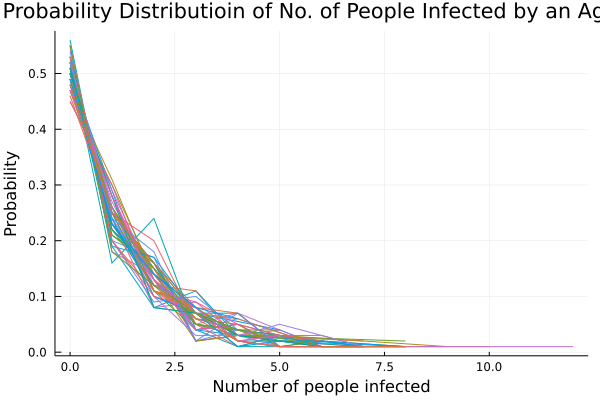

In [31]:
N = 100
p_I = 0.02
T = 1000

p = plot(xlabel="Number of people infected", ylabel="Probability", leg=false, title="Probability Distributioin of No. of People Infected by an Agent")

sims = 50
ps = []

for i in 1:sims
    t1, t2 = num_infected_dist_simulation(N, p_I, T)
    plot!(t1, t2)
    push!(ps, t2)
end

p

**There is a high probability that an individual might not infect anyone, which decays like an exponential distribution as the number of people increases**

Average the distribution over 50 simulations and plot the result.

In [32]:
ps

50-element Vector{Any}:
 [0.5, 0.29, 0.08, 0.07, 0.04, 0.01, 0.01]
 [0.5, 0.23, 0.12, 0.11, 0.02, 0.01, 0.01]
 [0.5, 0.25, 0.16, 0.02, 0.03, 0.02, 0.01, 0.01]
 [0.51, 0.22, 0.14, 0.05, 0.07, 0.01]
 [0.53, 0.22, 0.12, 0.05, 0.04, 0.03, 0.01]
 [0.52, 0.16, 0.24, 0.04, 0.01, 0.01, 0.01, 0.01]
 [0.55, 0.18, 0.14, 0.04, 0.05, 0.03, 0.01]
 [0.49, 0.23, 0.16, 0.08, 0.02, 0.01, 0.01]
 [0.5, 0.25, 0.1, 0.07, 0.07, 0.01]
 [0.45, 0.3, 0.14, 0.07, 0.03, 0.01]
 [0.56, 0.19, 0.08, 0.11, 0.03, 0.02, 0.01]
 [0.47, 0.29, 0.13, 0.05, 0.03, 0.01, 0.02]
 [0.53, 0.2, 0.17, 0.02, 0.04, 0.02, 0.01, 0.01]
 ⋮
 [0.48, 0.28, 0.13, 0.04, 0.05, 0.01, 0.01]
 [0.49, 0.26, 0.11, 0.07, 0.06, 0.01]
 [0.5, 0.28, 0.08, 0.07, 0.03, 0.02, 0.02]
 [0.49, 0.26, 0.14, 0.05, 0.04, 0.01, 0.01]
 [0.52, 0.19, 0.17, 0.07, 0.01, 0.03, 0.01]
 [0.52, 0.26, 0.1, 0.03, 0.03, 0.05, 0.01]
 [0.48, 0.24, 0.18, 0.02, 0.07, 0.01]
 [0.55, 0.2, 0.1, 0.08, 0.02, 0.03, 0.02]
 [0.47, 0.28, 0.12, 0.08, 0.02, 0.03]
 [0.55, 0.18, 0.12, 0.07, 0.04, 0.

In [33]:
len=0
for i in 1:sims
    if(length(ps[i])>len)
        len = length(ps[i])
    end
end

In [34]:
p_avg = zeros(len)

for i in 1:sims
    for j in 1:length(ps[i])
        p_avg[j] += ps[i][j]
    end
end
p_avg = p_avg./sims

8-element Vector{Float64}:
 0.5024000000000001
 0.24079999999999996
 0.13279999999999997
 0.061
 0.03640000000000002
 0.018400000000000014
 0.007200000000000003
 0.001

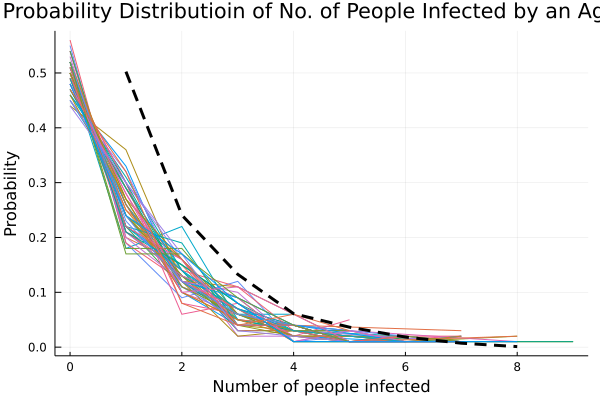

In [35]:
N = 100
p_I = 0.02
T = 1000

p = plot(xlabel="Number of people infected", ylabel="Probability", title="Probability Distributioin of No. of People Infected by an Agent")

sims = 50
ps = []

for i in 1:sims
    t1, t2 = num_infected_dist_simulation(N, p_I, T)
    plot!(t1, t2, leg=false)
    push!(ps, t2)
end
plot!(p_avg, ls=:dash, lw=3, color=:black)
p

# Epidemic model

Now we add recovery to our model using an additional parameter p_R in the step! and related functions.

In each sweep, each agent should check if it is infected, and if so it recovers with probability $p_R$.

The function simulation_with_recovery should return vectors Ss, Is and Rs giving the time evolution of the numbers of $S$, $I$ and $R$, as well as the probability distribution of number of people infected.

In [36]:
function step!(agents::Vector{Agent}, p_I, p_R)
    n = length(agents)
    i = rand(1:n)
    
    if agents[i].status == I
        j = i
        while j==i
            j = rand(1:n)
        end
        if agents[j].status == S
            if rand() <= p_I
                agents[j].status = I
                agents[i].num_infected += 1
            end
        end
        agents[i].status = rand() <= p_R ? R : I
    end
    return
end

step! (generic function with 3 methods)

In [37]:
function sweep!(agents::Vector{Agent}, p_I, p_R)
    n = length(agents)
    [step!(agents, p_I, p_R) for _ in 1:n]
end

sweep! (generic function with 3 methods)

In [38]:
function simulation_with_recovery(N, p_I, p_R, T)
    agents = [Agent() for i in 1:N]
    agents[1].status = I
    
    Ss = [N-1]
    Is = [1]
    Rs = [0]
    
    for _ in 1:T
        sweep!(agents, p_I, p_R)
        s= 0
        i = 0
        r = 0
        for k in 1:N
            if agents[k].status==S
                s+=1
            elseif agents[k].status==I
                i += 1
            else
                r += 1
            end
        end
        push!(Ss, s)
        push!(Is, i)
        push!(Rs, r)
    end
    
    data = [agents[i].num_infected for i in 1:N]
    a, b = probability_distribution(data)
    
    return a, b, Ss, Is, Rs
end

simulation_with_recovery (generic function with 1 method)

In [39]:
a, b, Ss, Is, Rs = simulation_with_recovery(1000, 0.1, 0.01, 1000);

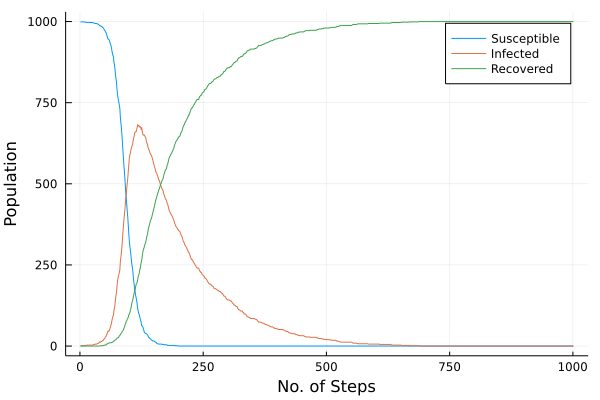

In [40]:
p = plot(xlabel="No. of Steps", ylabel="Population")
plot!(1:1:1001, Ss, label="Susceptible")
plot!(1:1:1001, Is, label="Infected")
plot!(1:1:1001, Rs, label="Recovered")

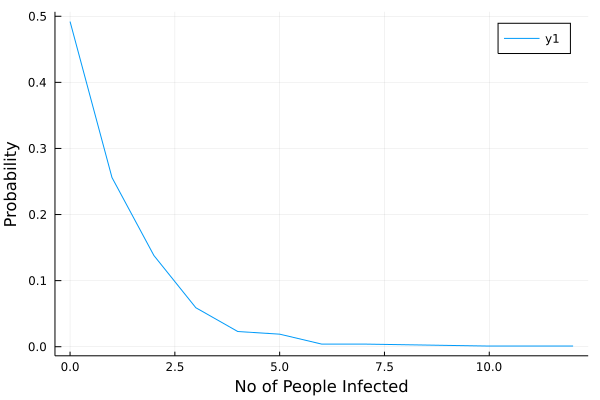

In [41]:
plot(a, b, xlabel="No of People Infected", ylabel="Probability")

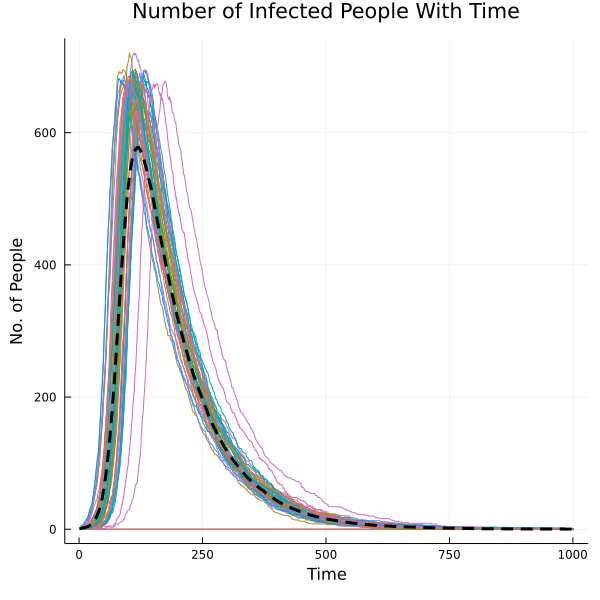

In [42]:
I_s = []
p = plot(title="Number of Infected People With Time", xlabel="Time", ylabel="No. of People", leg=false, size=(600,600))
for i in 1:50
    a, b, Ss, Is, Rs = simulation_with_recovery(1000, 0.1, 0.01, 1000);
    plot!(1:1:1001, Is)
    push!(I_s, Is)
end
plot!(mean(I_s), ls=:dash, lw=3, color=:black)
p